In [478]:
from pprint import pprint as print
import gensim
from gensim.summarization import summarize
from gensim.summarization import keywords
import requests
from gensim.summarization import mz_keywords
import yake
from yake.highlight import TextHighlighter
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
import re
import plotly.graph_objs as go
from sklearn.manifold import TSNE
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random

In [479]:
ted = pd.read_csv('./ted_main.csv/ted_main.csv')

In [480]:
ted = ted.dropna()
ted.isna().sum()

index                 0
comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
vl                    0
transcript            0
dtype: int64

In [481]:
ted.describe(include='all')
talks = pd.DataFrame()
talks['Speech'] = ted['transcript']
talks['url'] = ted['url']
talks['Speaker'] = ted['main_speaker']
talks['Title'] = ted['title']
talks['Description'] = ted['description']
talks['Tags'] = ted['tags']
talks['Speaker_Prof'] = ted['speaker_occupation']
talks['Rating'] = ted['ratings']
talks = talks.reset_index()
talks.drop(columns=['index'],inplace=True)
talks.head(60)

,Speech,url,Speaker,Title,Description,Tags,Speaker_Prof,Rating
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,Ken Robinson,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,"['children', 'creativity', 'culture', 'dance',...",Author/educator,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,Al Gore,Averting the climate crisis,With the same humor and humanity he exuded in ...,"['alternative energy', 'cars', 'climate change...",Climate advocate,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,David Pogue,Simplicity sells,New York Times columnist David Pogue takes aim...,"['computers', 'entertainment', 'interface desi...",Technology columnist,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...,Majora Carter,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...","['MacArthur grant', 'activism', 'business', 'c...",Activist for environmental justice,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,Hans Rosling,The best stats you've ever seen,You've never seen data presented like this. Wi...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",Global health expert; data visionary,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."
5,Thank you. I have to tell you I'm both challen...,https://www.ted.com/talks/tony_robbins_asks_wh...,Tony Robbins,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...","['business', 'culture', 'entertainment', 'goal...",Life coach; expert in leadership psychology,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'..."
6,"On September 10, the morning of my seventh bir...",https://www.ted.com/talks/julia_sweeney_on_let...,Julia Sweeney,Letting go of God,When two young Mormon missionaries knock on Ju...,"['Christianity', 'God', 'atheism', 'comedy', '...","Actor, comedian, playwright","[{'id': 3, 'name': 'Courageous', 'count': 477}..."
7,I'm going to present three projects in rapid f...,https://www.ted.com/talks/joshua_prince_ramus_...,Joshua Prince-Ramus,Behind the design of Seattle's library,Architect Joshua Prince-Ramus takes the audien...,"['architecture', 'collaboration', 'culture', '...",Architect,"[{'id': 9, 'name': 'Ingenious', 'count': 195},..."
8,It's wonderful to be back. I love this wonderf...,https://www.ted.com/talks/dan_dennett_s_respon...,Dan Dennett,Let's teach religion -- all religion -- in sch...,Philosopher Dan Dennett calls for religion -- ...,"['God', 'TED Brain Trust', 'atheism', 'brain',...","Philosopher, cognitive scientist","[{'id': 3, 'name': 'Courageous', 'count': 562}..."
9,"I'm often asked, ""What surprised you about the...",https://www.ted.com/talks/rick_warren_on_a_lif...,Rick Warren,A life of purpose,"Pastor Rick Warren, author of ""The Purpose-Dri...","['Christianity', 'God', 'culture', 'happiness'...","Pastor, author","[{'id': 21, 'name': 'Unconvincing', 'count': 8..."


In [482]:
def remove_stopwords(x):  
    
    stop_words = set(stopwords.words('english')) 
    x = re.sub("\([a-zA-Z0-9]+\)",' ',x)
    x = re.sub("[',-?\[\]\"]",' ',x)
    word_tokens = word_tokenize(x)  

    filtered_sentence = ""

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence = filtered_sentence+" "+str(w)

    return str(filtered_sentence).strip()

In [483]:
talks['Clean Speech'] = talks['Speech'].apply(remove_stopwords)

In [484]:
def extract_keywords_mz(X) :
    return (mz_keywords(X,scores=True))

def extract_keywords(X) :
    return (keywords(X,scores=True))

talks['Keywords'] = talks['Clean Speech'].apply(extract_keywords_mz)
talks['Keywords2'] = talks['Clean Speech'].apply(extract_keywords)

In [485]:
def Keywords_string(Series) : 

    s = ""
    for x in Series:
        if len(x)!=0 :
            s = s+" "+str(x[0])

    return s.strip()


In [486]:
talks['Keywords_String'] = talks['Keywords'].apply(Keywords_string)
talks['Keywords_String2'] = talks['Keywords2'].apply(Keywords_string)
talks['Keywords_String_Combined'] = talks['Keywords_String'] + talks['Keywords_String2']

In [510]:
talks[['Speech','Clean Speech','Keywords2','Keywords_String_Combined']]

,Speech,Clean Speech,Keywords2,Keywords_String_Combined
0,Good morning. How are you?(Laughter)It's been ...,Good morning How It great I blown away whole t...,"[(education, 0.2575092945815348), (educating, ...",education want come gillian he they ballet dra...
1,"Thank you so much, Chris. And it's truly a gre...",Thank much Chris And truly great honor opportu...,"[(carbon, 0.1680288160059238), (story, 0.13930...",going carbon get but make story time tipper ba...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",( Music The Sound Silence Simon & Garfunkel ) ...,"[(like, 0.277536679444336), (liked, 0.27753667...",call code enough really times type like column...
3,If you're here today — and I'm very happy that...,If today — I happy — heard sustainable develop...,"[(community, 0.2902637959836863), (development...",the area dog home park actually back bottom co...
4,"About 10 years ago, I took on the task to teac...",About years ago I took task teach global devel...,"[(country, 0.37862169425531483), (families cou...",life asia families america family size child l...
5,Thank you. I have to tell you I'm both challen...,Thank I tell I challenged excited My excitemen...,"[(people, 0.2846744710388598), (need, 0.229730...",i need something get you know people aye decis...
6,"On September 10, the morning of my seventh bir...",On September morning seventh birthday I came d...,"[(god, 0.2792592048268412), (said, 0.257948647...",santa age birthday reason seven claus day got ...
7,I'm going to present three projects in rapid f...,I going present three projects rapid fire I mu...,"[(build, 0.3116014283543136), (sort, 0.2342952...",library art book call one diagram elements enc...
8,It's wonderful to be back. I love this wonderf...,It wonderful back I love wonderful gathering A...,"[(thinking, 0.21150218900518777), (think, 0.21...",they sheep children goal natural anybody cow l...
9,"I'm often asked, ""What surprised you about the...",I often asked What surprised book And I say Th...,"[(know, 0.23775446956421964), (knows, 0.237754...",believe good think hand influence get identity...


In [488]:
def read_corpus(fname, tokens_only=False):
    
    for i, line in enumerate(fname):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
            
def get_corpus(X) : 
    train_corpus = list(read_corpus(X))
    # test_corpus = list(read_corpus(text, tokens_only=True))
    return train_corpus

In [489]:
corpus1 = get_corpus(talks['Keywords_String'])
corpus2 = get_corpus(talks['Keywords_String2'])
corpus3 = get_corpus(talks['Keywords_String_Combined'])

In [490]:
model1 = gensim.models.doc2vec.Doc2Vec(vector_size=120, epochs=30, use_norm=True)
model1.build_vocab(corpus1)

In [491]:
model2 = gensim.models.doc2vec.Doc2Vec(vector_size=100, epochs=30, use_norm=True)
model2.build_vocab(corpus2)

In [492]:
model3 = gensim.models.doc2vec.Doc2Vec(vector_size=200, epochs=30, use_norm=True)
model3.build_vocab(corpus3)

In [493]:
model1.train(corpus1, total_examples=model1.corpus_count, epochs=model1.epochs)

In [494]:
model2.train(corpus2, total_examples=model2.corpus_count, epochs=model2.epochs)

In [495]:
model3.train(corpus3, total_examples=model3.corpus_count, epochs=model3.epochs)

In [503]:
#Speech Recommendation based on user inputs
vector = model3.infer_vector(['economy'])
sims = model3.docvecs.most_similar([vector], topn=len(model3.docvecs))
print(talks.loc[sims[0][0],'Title'])
print(str(' '.join(corpus3[sims[0][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 1 : ',talks.loc[sims[1][0],'Title'],sims[1][0],sims[1][1], ' '.join(corpus3[sims[1][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 2 : ',talks.loc[sims[2][0],'Title'],sims[2][0],sims[2][1], ' '.join(corpus3[sims[2][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 3 : ',talks.loc[sims[3][0],'Title'],sims[3][0],sims[3][1], ' '.join(corpus3[sims[3][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 4 : ',talks.loc[sims[4][0],'Title'],sims[4][0],sims[4][1], ' '.join(corpus3[sims[4][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 5 : ',talks.loc[sims[5][0],'Title'],sims[5][0],sims[5][1], ' '.join(corpus3[sims[5][0]].words)))


'And now, the real news'
('news story stories year years billion robots robot kind kinds lot going '
 'matter long china modified fixing big betting bet difference different '
 'colony argentina stewart founded choose britain human antarctica kelly')
('Suggestion 1 : \n'
 ' Planning for the end of oil\n'
 ' 659 0.7303733229637146:\n'
 ' «oil years year story stories going talk energy peak peaked little abalone '
 'stuff material materials carbon build building world think calcium carbonate '
 'future talking different differently important fuels fuel idea ideas coal '
 'useful use starting start times time bit maybe percent natural nature '
 'produced producing come comes renewables end ended good decades decade right '
 'way mother picked»\n')
('Suggestion 2 : \n'
 ' Bio-lab on a microchip\n'
 ' 638 0.7288093566894531:\n'
 ' «countries actually hiv problem problems technology cell drugs people world '
 'drug entire epidemics epidemic time times disease miniaturization size sub '
 'dri

In [532]:
#Random Speech Generator
doc_id = random.randint(0, len(corpus3) - 1)
vector = model3.docvecs[doc_id]
sims = model3.docvecs.most_similar([vector], topn=len(model3.docvecs))
print(talks.loc[sims[0][0],'Title'])
print(str(' '.join(corpus3[sims[0][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 1 : ',talks.loc[sims[1][0],'Title'],sims[1][0],sims[1][1], ' '.join(corpus3[sims[1][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 2 : ',talks.loc[sims[2][0],'Title'],sims[2][0],sims[2][1], ' '.join(corpus3[sims[2][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 3 : ',talks.loc[sims[3][0],'Title'],sims[3][0],sims[3][1], ' '.join(corpus3[sims[3][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 4 : ',talks.loc[sims[4][0],'Title'],sims[4][0],sims[4][1], ' '.join(corpus3[sims[4][0]].words)))
print(u'%s\n %s\n %s %s:\n «%s»\n' % ('Suggestion 5 : ',talks.loc[sims[5][0],'Title'],sims[5][0],sims[5][1], ' '.join(corpus3[sims[5][0]].words)))

'3 principles for creating safer AI'
('fact objective machine might but coffee fetch what in mean problem behave '
 'call good let many now real species world wrong ai aligned badly behavior '
 'cat different exactly first information is king lee look lost lot mentioned '
 'midas part prefer principle purpose put sedol see simple stuart take thank '
 'thing three turing access alan allow already another back become board ca '
 'car choices classical comply copy data dead difficult difficulties disable '
 'domestic driving everybody evidence existence father five forward gold goody '
 'gorillas hal happy help home hungry ignorance imagine inevitable '
 'intelligence intelligent involved just keep lives long lunch massive '
 'maximize maybe minded mode model moment nastiness ok old our play power pr '
 'preferences programming pursuit question quotation rational researcher '
 'school second single siri sr tell third turning turns uncertainty '
 'understanding ways willing year years yes 

In [505]:
talks['Recommendations'] = talks['Keywords_String_Combined']
i = 0
for x in talks['Recommendations'] : 
    s = ""
    doc_id = i
    vector = model3.docvecs[doc_id]
    sims = model3.docvecs.most_similar([vector], topn=len(model3.docvecs))
    #s.append(talks.loc[sims[0][0],'Title'])
    s = s +talks.loc[sims[1][0],'Title']+"$"+talks.loc[sims[1][0],'Speaker']+"$"+talks.loc[sims[1][0],'Description']+"|"
    s = s +talks.loc[sims[2][0],'Title']+"$"+talks.loc[sims[2][0],'Speaker']+"$"+talks.loc[sims[2][0],'Description']+"|"
    s = s +talks.loc[sims[3][0],'Title']+"$"+talks.loc[sims[3][0],'Speaker']+"$"+talks.loc[sims[3][0],'Description']+"|"
    s = s +talks.loc[sims[4][0],'Title']+"$"+talks.loc[sims[4][0],'Speaker']+"$"+talks.loc[sims[4][0],'Description']+"|"
    s = s +talks.loc[sims[5][0],'Title']+"$"+talks.loc[sims[5][0],'Speaker']+"$"+talks.loc[sims[5][0],'Description']+"|"
    talks.loc[i,'Recommendations']  = s
    i +=1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


def reduce_dimensions(model,corpus):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for doc_id in range(len(corpus)):
        vectors.append(model.docvecs[doc_id])
        labels.append(talks.loc[doc_id,'Title'])

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)
    
    # reduce using PCA
#     vectors = np.asarray(vectors)
#     pca = PCA(n_components=2)
#     principalComponents = pca.fit_transform(vectors)
    
    
    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)
    
#     vectors = umap.UMAP(random_state=42).fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



        
x_vals, y_vals, labels = reduce_dimensions(model3,corpus3)


In [ ]:
def plot_with_plotly(corpus,x_vals, y_vals, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go
    
    labels = [] # keep track of words to label our data again later
    for doc_id in range(len(corpus)):
        labels.append(doc_id)
    
    labels = np.asarray(labels)
    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')
        
plot_with_plotly(corpus3,x_vals, y_vals)      

In [460]:
import matplotlib.colors as mcolors
x = mcolors.CSS4_COLORS
label1 = []
j = 1
for i in x:
    label1.append(i)

label1 = random.choices(label1, k=22)
label1

['khaki',
 'mediumblue',
 'lightsalmon',
 'steelblue',
 'black',
 'darkred',
 'indianred',
 'azure',
 'azure',
 'greenyellow',
 'lightskyblue',
 'darkslategray',
 'dimgray',
 'mediumseagreen',
 'maroon',
 'yellowgreen',
 'lightpink',
 'cyan',
 'silver',
 'bisque',
 'slategray',
 'royalblue']

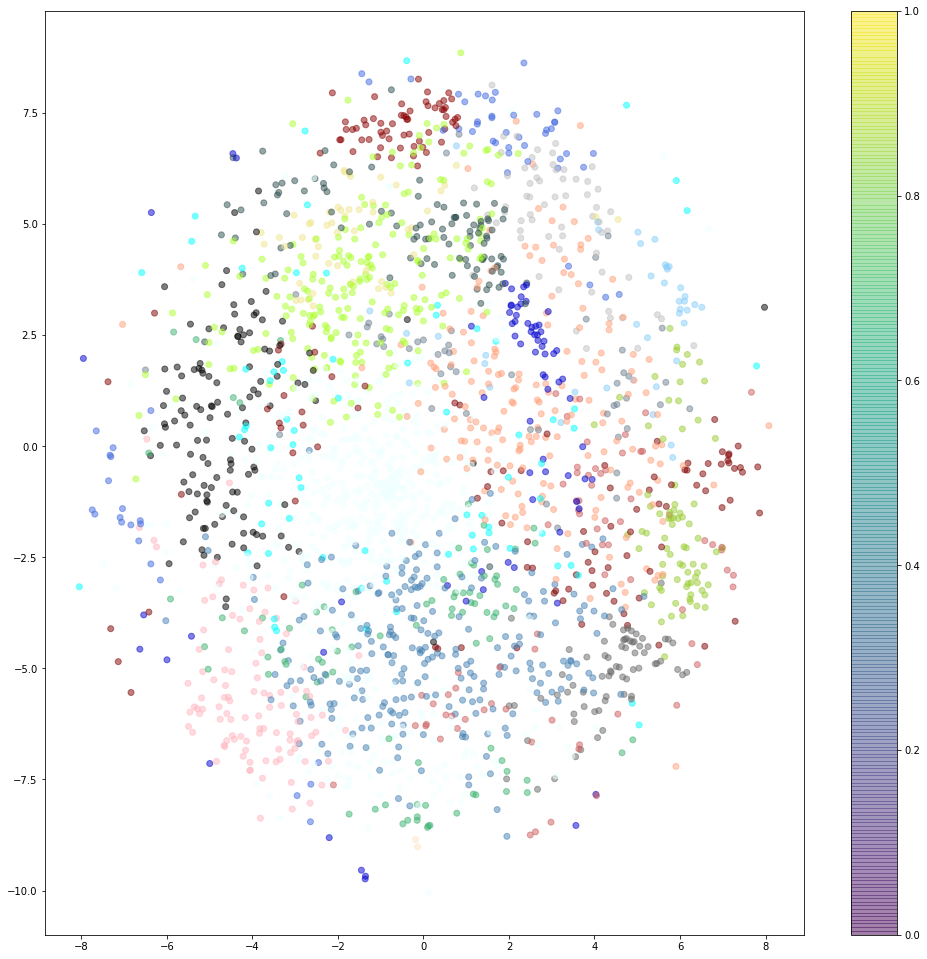

7     461
3     253
9     211
2     187
4     128
8     109
16    105
11    103
14     96
13     93
15     77
1      76
6      73
12     71
17     71
18     64
21     64
5      60
0      54
20     50
10     40
19      2
Name: Cluster, dtype: int64

In [472]:
import matplotlib.pyplot as plt

doc_vectors = model3.docvecs.vectors_docs
tsne = TSNE(n_components=2, random_state=0, early_exaggeration = 30, perplexity=100)

kmeans_model = KMeans(n_clusters=22, init='k-means++', max_iter=100)  
kmeans_model.fit(doc_vectors)

labels=kmeans_model.labels_.tolist()
datapoint = tsne.fit_transform(doc_vectors)

plt.figure(figsize=(17, 17))

color = [label1[i] for i in labels]

plt.scatter(datapoint[:, 0], datapoint[:, 1], alpha=0.5, c=color)
plt.colorbar();  # show color scale

plt.show()

talks['Cluster'] = kmeans_model.labels_
talks['Cluster'].value_counts()

In [508]:
talks.to_csv('talks.csv')

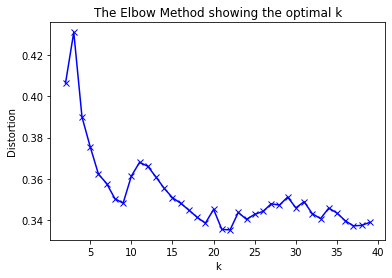

In [409]:
from sklearn.metrics import silhouette_score


from scipy.spatial.distance import cdist
doc_vectors = model3.docvecs.vectors_docs

tsne = TSNE(n_components=2, random_state=0)
datapoint = tsne.fit_transform(doc_vectors)
# k means determine k
distortions = []
K = range(2,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    #kmeanModel.fit(datapoint)
    #distortions.append(sum(np.min(cdist(datapoint, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    preds = kmeanModel.fit_predict(datapoint)
    distortions.append(silhouette_score (datapoint, preds))
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [473]:
labels = [] # keep track of words to label our data again later
for doc_id in range(len(corpus3)):
    labels.append(talks.loc[doc_id,'Title'])


df_subset = pd.DataFrame()
df_subset['labels'] = labels
df_subset['cluster'] = kmeans_model.labels_
df_subset['x'] = datapoint[:, 0]
df_subset['y'] = datapoint[:, 1]
df_subset.to_csv('filename.tsv', sep = '\t')